In [29]:
import tensorwatch as tw
import pandas as pd
import os
import matplotlib.pyplot as plt

In [30]:
class csv_files:
    
    def __init__(self, name, dir):
        parts = name.split("_")
        ##print(parts)
        path = dir + "/" + name
        if not os.path.isdir(path):
            self.valid  = False
            return
            
        if not os.path.isfile(path + "/results.csv"):
            self.valid  = False
            return
        
        self.valid = True
        self.model = parts[0]
        self.dataset = parts[1]
        
            
        self.accumulation = ""
        
        if not "sparse" in parts[2] and not "dense" in parts[2]:
            if not parts[2] == "0-0-0":
                self.accumulation = self.accumulation + parts[2] 
            else:
                self.accumulation = "fp32"

        
        self.sparsity = parts[3]
        
        self.chunkiness = parts[4]

        self.batch = int(parts[5][1:])

        self.desc =  ""
        if len(parts) > 6:
                self.mode =  int(parts[6][4:])
        else:
            self.mode = 0
            

        if len(parts) > 7:
                self.desc =  parts[7]
        else:
            self.desc = "BN"
            
        self.path = path + "/results.csv"
                
            
    def __str__(self):
        if self.valid:
            str = f"model: {self.model}, dataset: {self.dataset}, accumulation: {self.accumulation}, sparsity: {self.sparsity}, batch: {self.batch}, chunks: {self.chunkiness}, mode: {self.mode} {self.desc}"
            return str
        else:
            return "invalid"
                             
            
    def get_data(self, col):
        df = pd.read_csv(self.path)
        df["training loss"].to_numpy
        data = df[col].to_numpy()
        return data
            
        

def compare_function(file, model = None, dataset = None, accumulation = None, batch = None, chunkiness = None, sparsity = None, mode = None, desc = None):
    if model is not None:
        if not file.model == model:
            return False
    
    if dataset is not None:
        if not file.dataset == dataset:
            return False
    
    
    if accumulation is not None:
        if not file.accumulation == accumulation:
            return False

    if sparsity is not None:
        if not file.sparsity == sparsity:
            return False
        
        
    if batch is not None:
        if not file.batch == batch:
            return False
        
    
    if chunkiness is not None:
        if not file.chunkiness == chunkiness:
            return False
        
    if mode is not None:
        if not file.mode == mode:
            return False
        
    if desc is not None:
        if not file.desc == desc:
            return False
        
    return True

def get_title(model = None, dataset = None, accumulation = None, batch = None, chunkiness = None, sparsity = None, mode = None, desc = None):
    title = ""
    if model is not None:
        title = title + f"model: {model}, " 
    
    if dataset is not None:
        title = title + f"dataset: {dataset}, " 

    if accumulation is not None:
        title = title + f"accumulation: {accumulation}, " 
        
    if sparsity is not None:
        title = title + f"sparsity: {sparsity}, " 
        
    if batch is not None:
        title = title + f"batch: {batch}, " 
        
    if chunkiness is not None:
        title = title + f"chunkiness: {chunkiness}, " 
        
    if mode is not None:
        title = title + f"mode: {mode}, " 
        
    if desc is not None:
        title = title + f"{desc}, " 
        
        
    return title[:-2]


def plot_baseline(col ="validation error1", sparsity = "dense"):
    params = {'chunkiness' : "0-0-0", 'batch' : 128, 'sparsity' : sparsity, 'accumulation' : "fp32"}

    to_compare = [file for file in files if compare_function(file, **params) ] 
    title = get_title(**params)
    labeler = lambda x: f"baseline"

    compare(to_compare[:], col = col, labeler = labeler ,title = title, sorter = sorter )


        
def compare(files_list, col = "validation error1", labeler = lambda x: str(x), title = None, sorter  = lambda x: str(x), mark="-" ):
    
    sames = {}        
    
    results = {}
    
    sorted_file_list = files_list.copy()
    
    sorted_file_list.sort(key = lambda x: sorter(x))
    
    for file in sorted_file_list:
        label = labeler(file)
        data = file.get_data(col)
        epochs = file.get_data("epoch")
        plt.plot(epochs , data, mark, label = label)
        
        print("%s: %.02f%%" % (label, data.min()))

    if title:
        plt.title(title)
        
    plt.xlabel("Epochs")
    plt.ylabel(col)
    
    
    

In [31]:
        
filter = "_"
files = [csv_files(file,"./results") for file in os.listdir("results")]
files = [file for file in files if file.valid]

files = [file for file in files if len(file.get_data("epoch")) == 200]    


##[str(file) for file in files]    

In [32]:
[str(file) for file in files]


['model: resnet18, dataset: cifar10, accumulation: 8-8-8, sparsity: sparse2-4, batch: 128, chunks: 0-0-0, mode: 0 BN',
 'model: resnet18, dataset: cifar10, accumulation: 3-3-3, sparsity: sparse2-4, batch: 128, chunks: 0-0-0, mode: 0 BN',
 'model: resnet18, dataset: cifar10, accumulation: 6-4-6, sparsity: sparse2-4, batch: 128, chunks: 0-0-0, mode: 0 BN',
 'model: resnet18, dataset: cifar10, accumulation: 9-9-9, sparsity: dense, batch: 128, chunks: 0-0-0, mode: 0 GN',
 'model: resnet18, dataset: cifar10, accumulation: 6-6-6, sparsity: sparse8-16, batch: 128, chunks: 0-0-0, mode: 0 BN',
 'model: resnet18, dataset: cifar10, accumulation: 7-7-7, sparsity: dense, batch: 128, chunks: 0-0-0, mode: 0 GN',
 'model: resnet18, dataset: cifar10, accumulation: 5-5-5, sparsity: dense, batch: 128, chunks: 0-0-0, mode: 0 GN8',
 'model: resnet18, dataset: cifar10, accumulation: 3-3-3, sparsity: dense, batch: 128, chunks: 0-0-0, mode: 0 GN',
 'model: resnet18, dataset: cifar10, accumulation: 7-7-7, spar

4-4-4, GN8, mode 0: 20.23%
5-5-5, GN8, mode 0: 14.16%
5-5-5, GN8, mode 0: 12.79%
5-0-0, GN8, mode 0: 11.21%
5-5-5, GN8, mode 0: 12.09%
6-6-6, GN8, mode 0: 11.69%
7-7-7, GN8, mode 0: 10.77%
0-0-5, GN8, mode 0: 13.19%
fp32, GN8, mode 0: 10.78%
0-5-0, GN8, mode 0: 10.58%
0-0-4, GN8, mode 0: 18.02%
fp32, BN, mode 0: 8.04%


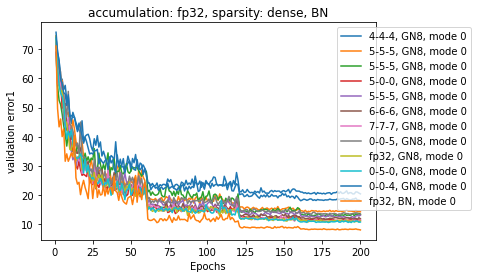

In [33]:
params = {'sparsity' : "dense", 'desc': 'GN8'}

to_compare = [file for file in files if compare_function(file, **params) ] 
title = get_title(**params)
labeler = lambda x: f"{x.accumulation.replace('0-0-0','fp32')}, {x.desc}, mode {x.mode}"
sorter = lambda x: int(x.accumulation.replace("fp32","0-0-0").replace("0","23-23-23").split("-")[0])  


##compare(to_compare[:], labeler = labeler ,title = title, sorter = sorter )
compare(to_compare[:], col="validation error1", labeler = labeler ,title = title, sorter = sorter )



params = {'sparsity' : "dense", 'desc': 'BN', 'accumulation': 'fp32'}

to_compare = [file for file in files if compare_function(file, **params) ] 
title = get_title(**params)


compare(to_compare[:], col="validation error1", labeler = labeler ,title = title, sorter = sorter )

##plot_baseline(sparsity = "dense")

plt.legend( loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.show()

    

5-fp32-fp32, GN8: 11.21%
5-fp32-fp32, BN: 8.09%
fp32-fp32-5, GN8: 13.19%
fp32-fp32-5, GN: 18.79%
fp32-fp32-5, BN: 12.72%
fp32-5-fp32, GN8: 10.58%
fp32-5-fp32, BN: 8.31%
fp32, GN: 13.21%
fp32, GN8: 10.78%
fp32, BN: 8.04%


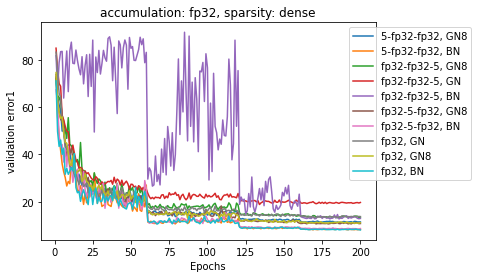

In [34]:
params = {'chunkiness' : "0-0-0", 'batch' : 128, 'sparsity' : "dense", 'mode': 0}

to_compare = [file for file in files if compare_function(file, **params) ] 
to_compare = [file for file in files if "0-0-5" in file.path ] + [file for file in files if "0-5-0" in file.path ] + [file for file in files if "5-0-0" in file.path ]


title = get_title(**params)
labeler = lambda x: f"{x.accumulation.replace('0','fp32')}, {x.desc}"
sorter = lambda x: int(x.accumulation.replace("fp32","23-23-23").replace("0","23-23-23").split("-")[0])  


##compare(to_compare[:], labeler = labeler ,title = title, sorter = sorter )
compare(to_compare[:], col="validation error1", labeler = labeler ,title = title, sorter = sorter )



params = {'sparsity' : "dense", 'accumulation': 'fp32'}

to_compare = [file for file in files if compare_function(file, **params) ] 
title = get_title(**params)

compare(to_compare[:], col="validation error1", labeler = labeler ,title = title, sorter = sorter )

##plot_baseline(sparsity = "dense")

plt.legend( loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.show()

    

5-5-5: 33.80%
5-5-5: 35.19%
5-5-5: 16.86%
5-5-5: 32.22%
5-5-5: 32.97%
5-5-5: 31.67%


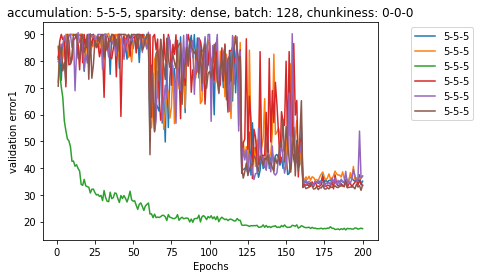

In [13]:
params = {'chunkiness' : "0-0-0", 'batch' : 128, 'sparsity' : "dense", 'accumulation' : "5-5-5"}

to_compare = [file for file in files if compare_function(file, **params) ] 
title = get_title(**params)
labeler = lambda x: f"{x.mode}, {x.desc}"
sorter = lambda x: x.mode  

compare(to_compare[:], labeler = labeler ,title = title, sorter = sorter )
##compare(to_compare[:], col="training error1", labeler = labeler ,title = title, sorter = sorter )


##plot_baseline(sparsity = "dense")

plt.legend( loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.show()

    

3-3-3, GN: 29.33%
4-4-4, GN8: 22.24%
4-4-4, GN: 20.05%
5-5-5, GN8: 14.33%
5-5-5, GN: 15.36%
5-5-5, BN: 37.79%
6-6-6, GN: 12.29%
6-6-6, GN8: 10.80%
6-6-6, BN: 10.99%
7-7-7, GN: 10.77%
7-7-7, GN8: 9.31%
8-8-8, GN: 10.31%
9-9-9, GN: 10.16%
10-10-10, GN: 10.19%
fp32, GN: 10.28%
fp32, GN8: 8.66%
fp32, BN: 6.97%


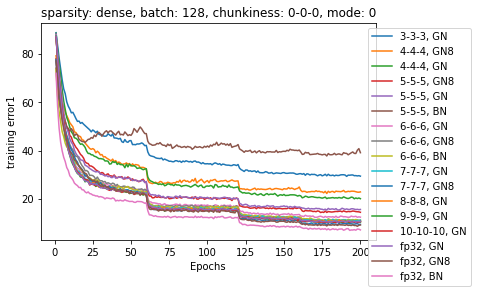

In [7]:
params = {'chunkiness' : "0-0-0", 'batch' : 128, 'sparsity' : "dense", 'mode': 0}

to_compare = [file for file in files if compare_function(file, **params) ]   
title = get_title(**params)
labeler = lambda x: f"{x.accumulation}, {x.desc}"
sorter = lambda x: int(labeler(x).replace("fp32","23-23-23").split("-")[0])  

compare(to_compare[:],col = "training error1" ,  labeler = labeler ,title = title, sorter = sorter )
plt.legend( loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.show()



8-8-8: 9.80%
3-3-3: 60.25%
6-4-6: 36.82%
7-7-7: 10.31%
6-6-6: 12.23%
4-4-6: 33.59%
10-10-10: 9.74%
fp32: 9.30%
9-9-9: 9.44%
6-6-4: 40.78%
4-6-6: 12.40%
4-4-4: 54.57%
5-5-5: 38.50%
2-2-2: 64.73%


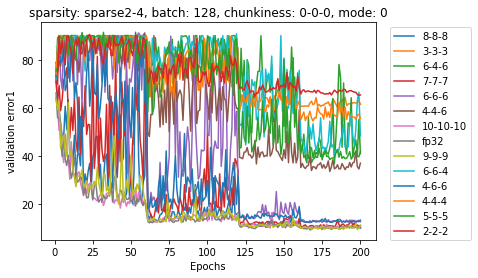

In [175]:
params = {'chunkiness' : "0-0-0", 'batch' : 128, 'sparsity' : "sparse2-4", 'mode': 0}




to_compare = [file for file in files if compare_function(file, **params) ]   


to_compare = [file for file in to_compare if file]   

title = get_title(**params)
labeler = lambda x: f"{x.accumulation}"
sorter = lambda x: int(labeler(x).split("-")[0])  
sorter = None
compare(to_compare[:], labeler = labeler ,title = title, sorter = sorter )
plt.legend( loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.show()

    

b = 32, GN8: 12.79%
b = 64, GN8: 12.09%
b = 128, GN8: 14.16%
baseline (GN8, fp32): 10.78%


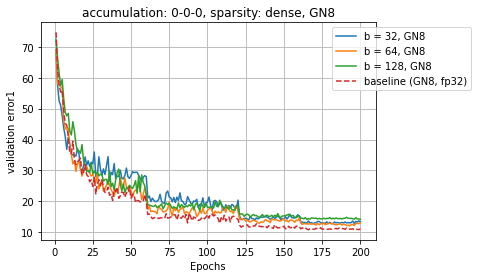

In [22]:

params = {'chunkiness' : "0-0-0", 'accumulation' : "5-5-5", 'sparsity' : "dense", 'mode': 0, 'desc': 'GN8'}

to_compare = [file for file in files if compare_function(file, **params) ]   
title = get_title(**params)
labeler = lambda x: f"b = {x.batch}, {x.desc}"
sorter = lambda x: x.batch

compare(to_compare[:], labeler = labeler ,title = title, sorter = sorter)
##compare(to_compare[:], col = "training error1" , labeler = labeler ,title = title, sorter = sorter)

##plt.gca().set_prop_cycle(None)


# params = {'chunkiness' : "0-0-0", 'accumulation' : "6-6-6", 'sparsity' : "sparse2-4"}

# to_compare = [file for file in files if compare_function(file, **params) ]   
# title = get_title(**params)
# labeler = lambda x: f"b = {x.batch}"
# sorter = lambda x: x.batch

# compare(to_compare[:], labeler = labeler ,title = title, sorter = sorter, mark = "--")


params = {'sparsity' : "dense", 'desc': 'GN8', 'accumulation': '0-0-0'}

to_compare = [file for file in files if compare_function(file, **params) ] 
title = get_title(**params)
compare(to_compare[:], labeler = lambda x: "baseline (GN8, fp32)" ,title = title, sorter = sorter, mark = "--")


plt.legend( loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.grid()

plt.show()




dense, GN: 13.21%
sparse2-4, BN: 9.30%
dense, GN8: 10.78%
dense, BN: 8.04%


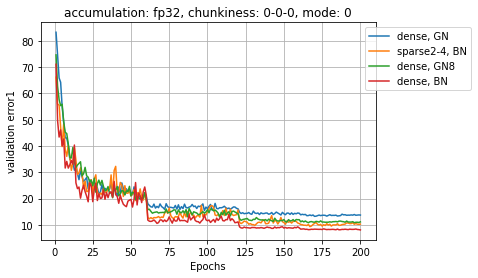

In [32]:

params = {'chunkiness' : "0-0-0", 'accumulation' : "fp32", 'mode': 0}

to_compare = [file for file in files if compare_function(file, **params) ]   



title = get_title(**params)
labeler = lambda x: f"{x.sparsity}, {x.desc}"
sorter = lambda x: 0

compare(to_compare[:], labeler = labeler ,title = title, sorter = sorter)


plt.legend( loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.grid()

plt.show()




b = dense: 32.97%
b = dense: 16.86%
b = dense: 14.16%
b = sparse2-4: 38.50%
b = sparse4-8: 34.58%


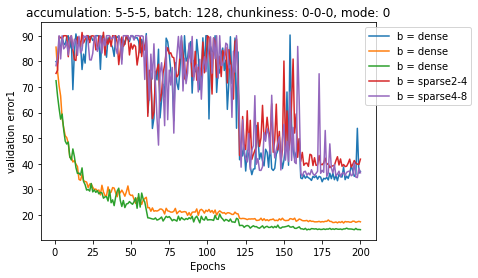

b = dense: 8.04%


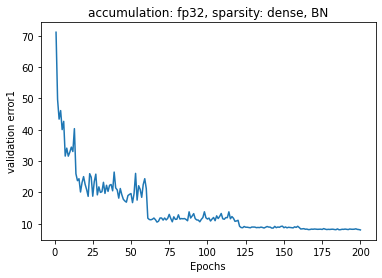

In [10]:

params = {'chunkiness' : "0-0-0", 'accumulation' : "5-5-5", 'batch': 128, 'mode': 0 }

to_compare = [file for file in files if compare_function(file, **params) ]   
title = get_title(**params)
labeler = lambda x: f"b = {x.sparsity}"

compare(to_compare[:], labeler = labeler ,title = title )
plt.legend( loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.show()




compare(to_compare[:], col="validation error1", labeler = labeler ,title = title, sorter = sorter )





No handles with labels found to put in legend.


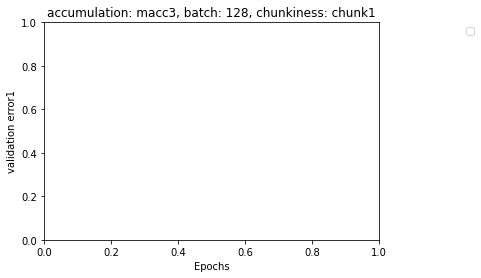

In [65]:

params = {'chunkiness' : "chunk1", 'accumulation' : "macc3", 'batch': 128, 'mode': 0 }
to_compare = [file for file in files if compare_function(file, **params) ]   
title = get_title(**params)
labeler = lambda x: f"b = {x.sparsity}"


compare(to_compare[:], labeler = labeler ,title = title)
plt.legend( loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.show()


chunks: = 0-0-0: 10.31%
chunks: = 1-1-1: 51.31%
chunks: = 16-16-16: 14.19%
chunks: = 64-64-64: 11.04%
chunks: = 128-128-128: 11.22%


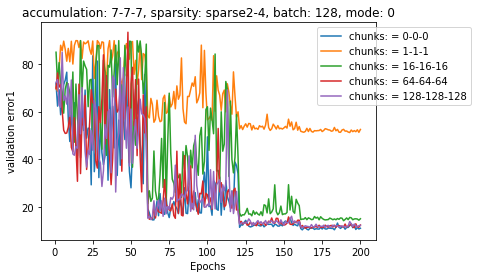

In [159]:

params = {'accumulation' : "7-7-7", 'batch': 128, 'sparsity': 'sparse2-4', 'mode': 0}
to_compare = [file for file in files if compare_function(file, **params) ]   
title = get_title(**params)
labeler = lambda x: f"chunks: = {x.chunkiness}"
sorter = lambda x: int(x.chunkiness.split("-")[0])

compare(to_compare[:], labeler = labeler ,title = title, sorter = sorter)
plt.legend( loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.show()
